Downloading data:

In [38]:
batch_size = 200
data_dir = '/home/clewis7/repos/stor566-notebooks/hmw2/hmw2-data/'

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import torch.utils.data as td
import random, time
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler

## USE THIS SNIPPET TO GET BINARY TRAIN/TEST DATA

train_data = datasets.MNIST(data_dir, train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))
# Once you have downloaded the data by setting download=True, you can
# change download=True to download=False
test_data = datasets.MNIST(data_dir, train=False, download=False,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

subset_indices = ((train_data.targets == 0) + (train_data.targets == 1)).nonzero()
train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size, 
  shuffle=False,sampler=SubsetRandomSampler(subset_indices.view(-1)))


subset_indices = ((test_data.targets == 0) + (test_data.targets == 1)).nonzero()
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size, 
  shuffle=False,sampler=SubsetRandomSampler(subset_indices.view(-1)))

### 1. (20 points) Implement **Logistic Regression** with Pytorch to do handwritten digit 0 vs. 1 classification. Pick an optimizer yourself. 

In [40]:
class LogisticRegression(torch.nn.Module):
     def __init__(self, input_dim, output_dim):
         super(LogisticRegression, self).__init__()
         self.linear = torch.nn.Linear(input_dim, output_dim)
            
     def forward(self, x):
         out = torch.sigmoid(self.linear(x))
         return out

In [41]:
input_dim = 28*28
output_dim = 1
model = LogisticRegression(input_dim,output_dim)

In [42]:
criterion = torch.nn.BCELoss()

In [44]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

In [45]:
from tqdm import tqdm

epochs = iterations / (total data / batch size)

In [46]:
# The number of epochs is at least 10, you can increase it to achieve better performance
num_epochs = 25

avg_losses = list()

# Training the Model
for epoch in tqdm(range(num_epochs)):
    batch_losses = list()
    for i, (images, labels) in enumerate(train_loader):
        # Convert the 28*28 image matrix into a 784-dim vector
        images = images.view(-1, 28*28).requires_grad_()
        labels = labels
        # Convert labels from 0,1 to -1,1
        #labels = 2*(labels.float()-0.5)
        
        # TODO 
        # 1. Compute Loss. Check torch functions for the corresponding loss for Logistic and SVM
        optimizer.zero_grad()
    
        prediction = model.forward(images)
        
        batch_loss = criterion(prediction, labels.reshape(-1,1).to(torch.float32))
        
        batch_loss.backward()
        
        # 2. Do optimization. Check torch.optim to see how to do optimization with pytorch
        optimizer.step()
    
        # 3. Save batch loss
        batch_losses.append(batch_loss.detach().numpy())

    # Save average epoch loss
    avg_epoch_loss = (1 / batch_size) * np.sum(batch_losses)
    avg_losses.append(avg_epoch_loss)
    
    
    

100%|███████████████████████████████████████████| 25/25 [00:25<00:00,  1.03s/it]


### (a) (5 points) Report the hyper-parameters (number of epochs, learning rate, momentum etc).

**Hyper-Parameters**

Number of Epochs: 10

Learning Rate: 0.01

Momentum: 0.9

### (b) (10 points) Report the **Average loss of an epoch** for every epoch by generating Average Loss vs. Epoch plot. Please report at least **10** epochs.

In [36]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Average Loss')

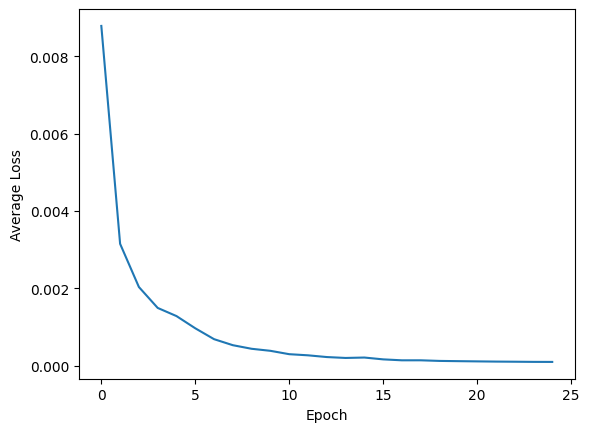

In [47]:
plt.plot(avg_losses)
plt.xlabel("Epoch")
plt.ylabel("Average Loss")

In [48]:
model.parameters()

<generator object Module.parameters at 0x7f04ecb53900>

### (c) (5 points) Report the final testing accuracy of trained model.

In [66]:
model.parameters().data.detach().numpy()

AttributeError: 'generator' object has no attribute 'data'

In [76]:
N = len(test_data)
# accuracy_sum = 0
# for i in tqdm(range(N)):
#     accuracy_sum += 1(predicted_labels[i] == actual_label[i]
    
correct = 0
total = 0
for images, labels in test_loader:
    images = images.view(-1, 28*28).requires_grad_()
    labels = labels
    
    
    outputs = model(images)
    print(outputs[0].data)

    # _, predicted = torch.max(outputs.data, 1)
    # print(predicted)
    
#     total += labels.size(0)

# accuracy = 100 * correct / total

tensor([1.7189e-13])
tensor([1.])
tensor([2.5432e-19])
tensor([0.9976])
tensor([3.8978e-11])
tensor([6.2649e-08])
tensor([1.])
tensor([1.])
tensor([1.4416e-22])
tensor([1.2021e-23])
tensor([4.7514e-12])


In [58]:
len(test_loader)

11

In [19]:
accuracy

0.0

## Problem 2 (60 points)

In this problem you will practice implementing MLP and CNN to classify daily life images (CIFAR10).

**Data.** You will use CIFAR10 classification dataset (10 classes). Pytorch/torchvision has provide a useful dataloader to automatically download and load the data into batches. Code of the data loader has been provided in the template. Please don't modify the data loading part.

In [39]:
## Data loading code chunk, please don't modify it. 
## However, you can adjust the batch size if you want to.
batch_size_cifar = 64
data_dir = './data'

def cifar_loaders(batch_size, shuffle_test=False): 
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.225, 0.225, 0.225])
    train = datasets.CIFAR10(data_dir, train=True, download=False, 
        transform=transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.RandomCrop(32, 4),
            transforms.ToTensor(),
            normalize,
        ]))
    # Once you have downloaded the data by setting download=True, you can
    # change download=True to download=False
    test = datasets.CIFAR10(data_dir, train=False, 
        transform=transforms.Compose([transforms.ToTensor(), normalize]))
    train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size,
        shuffle=True, pin_memory=True)
    test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size,
        shuffle=shuffle_test, pin_memory=True)
    return train_loader, test_loader

train_loader, test_loader = cifar_loaders(batch_size_cifar)

### **Problem Description.**
### 1. (20 points) Implement a 7 layers fully-connected neural networks with ReLU activation to do image classification. 

### (a) (5 points) Print the model architecture.

### (b) (10 points) Report the **Average loss of an epoch** for every epoch by generating Average Loss vs. Epoch plot. Please report at least **10** epochs.

### (c) (5 points) Report the final testing accuracy of trained model.

### 2. (30 points) Implement a 7 layers CNN with 4 convolutional layers, 3 fully-connected layers and ReLU activation function. The input dimension of the 1st fully-connected layer must be 4096.

### (a) (5 points) Print the model architecture.

### (b) (10 points) Report the **Average loss of an epoch** for every epoch by generating Average Loss vs. Epoch plot. Please report at least **10** epochs.

### (c) (5 points) Report the final testing accuracy of trained model.

### (d) (10 points) Write a new cifar$\_$loaders function to try different data augmentation methods.

### 3. (10 points) Please compare the results of the two models (MLP and CNN).